<a href="https://colab.research.google.com/github/joel-soffo/joel-soffo/blob/main/GWP3_Merton_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

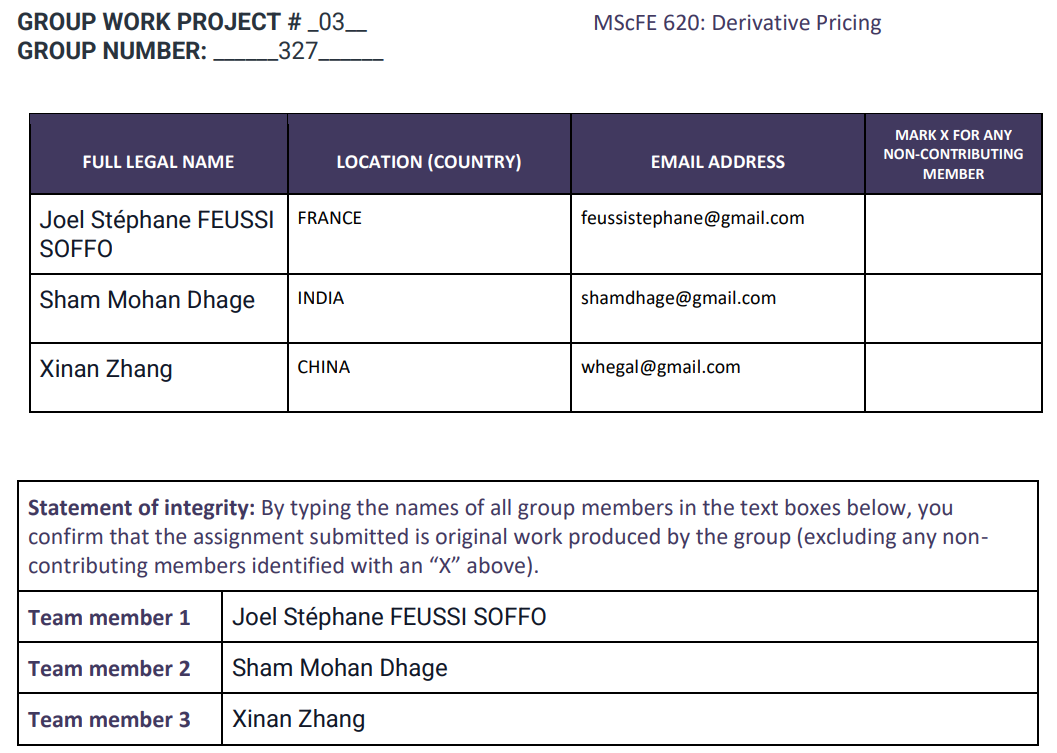

# GWP-3 

We first define the different functions that will help us throughout our work

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [2]:
def SDE_vol(v0, kappa, theta, sigma, T, M, Ite, rand, row, cho_matrix):
    dt = T / M  # T = maturity, M = number of time steps
    v = np.zeros((M + 1, Ite), dtype=np.float64)
    v[0] = v0
    sdt = np.sqrt(dt)  # Sqrt of dt
    for t in range(1, M + 1):
        ran = np.dot(cho_matrix, rand[:, t])
        v[t] = np.maximum(
            0,
            v[t - 1]
            + kappa * (theta - v[t - 1]) * dt
            + np.sqrt(v[t - 1]) * sigma * ran[row] * sdt,
        )
    return v


def Heston_paths(S0, r, v, row, cho_matrix):
    S = np.zeros((M + 1, Ite), dtype=float)
    S[0] = S0
    sdt = np.sqrt(dt)
    for t in range(1, M + 1, 1):
        ran = np.dot(cho_matrix, rand[:, t])
        S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[row] * sdt)

    return S


def random_number_gen(M, Ite):
    rand = np.random.standard_normal((2, M + 1, Ite))
    return rand

In [3]:
def heston_mc(S, K, r, T, t,opttype):
    if opttype == "C":
        payoff = np.maximum(0, S[-1, :] - K)
    else:
        payoff = np.maximum(0, K- S[-1, :])
        
    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

In [4]:
def merton_mc(S, K, r, T, t,opttype):
 
    if opttype == "C":
        payoff = np.maximum(0, S[-1, :] - K)
    else:
        payoff = np.maximum(0, K- S[-1, :])
        
    average = np.mean(payoff)

    return np.exp(-r * (T - t)) * average

In [5]:
def merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt):
    SM = np.zeros((M + 1, Ite))
    SM[0] = S0

    # rj
    rj = lamb * (np.exp(mu + 0.5 * delta**2) - 1)

    # Random numbers
    z1 = np.random.standard_normal((M + 1, Ite))
    z2 = np.random.standard_normal((M + 1, Ite))
    y = np.random.poisson(lamb * dt, (M + 1, Ite))
    
    for t in range(1, M + 1):
        SM[t] = SM[t - 1] * (
            np.exp((r - rj - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z1[t])
            + (np.exp(mu + delta * z2[t]) - 1) * y[t]
        )
        SM[t] = np.maximum(
            SM[t], 0.00001
        )  # To 

    return SM
    

# Q5 
### Heston Model and Monte-Carlo simulation, price an ATM European call and put, using a correlation of -0.30.

In [6]:
# Heston given parameters
v0 = 0.032
kappa_v = 1.85
sigma_v = 0.35
theta_v = 0.045
rho = -0.3 # Correlattion -0.30

r = 0.055  # Risk-free rate 5.5% as per GWP3
T = 3/12  # Maturity/time period (in years) 3 months as per GWP3
S0 = 80  # Current Stock Price as per GWP3

Ite = 100000  # Number of simulations (paths)
M = 100  # Number of steps  - 
dt = T / M  # Time-step


# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

In [7]:
K = 80
call_price_80 = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price_80 = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3: ", call_price_80)
print("European Put Price under Heston with correlation at -0.3: ", put_price_80)
print(round(call_price_80 - put_price_80, 2))
print(round(S0 - K * np.exp(-r * T), 2))
print("put-call parity is not satisfied.")
print("We notice that the call-put parity is not satisfied. This may be due to the fact that the model is based on random generation of some data.\n However, we think that this would have been the case if the number of simulation had been greater than the one we considered (100000)")

European Call Price under Heston with correlation at -0.3:  2.87
European Put Price under Heston with correlation at -0.3:  2.84
0.03
1.09
put-call parity is not satisfied.
We notice that the call-put parity is not satisfied. This may be due to the fact that the model is based on random generation of some data.
 However, we think that this would have been the case if the number of simulation had been greater than the one we considered (100000)


In [8]:
# Delta
S0 = 81
K = 80
# Generating random numbers from standard normal
#rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

call_price_81 = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price_81 = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3: ", call_price_81)
print("European Put Price under Heston with correlation at -0.3: ", put_price_81)
d_c_1 = round((call_price_81 - call_price_80) / (81 - 80), 2)
d_p_1 = round((put_price_81 - put_price_80) / (81 - 80), 2)
print("Delta for call option is", d_c_1)
print("Delta for put option is", d_p_1)

European Call Price under Heston with correlation at -0.3:  3.43
European Put Price under Heston with correlation at -0.3:  2.42
Delta for call option is 0.56
Delta for put option is -0.42


In [9]:
# gamma
S0 = 82
K = 80
# Generating random numbers from standard normal
#rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

call_price_82 = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price_82 = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3: ", call_price_82)
print("European Put Price under Heston with correlation at -0.3: ", put_price_82)
d_c_2 = round((call_price_82 - call_price_81) / (82 - 81), 2)
d_p_2 = round((put_price_82 - put_price_81) / (82 - 81), 2)
print("Delta for call option is", d_c_2)
print("Delta for put option is", d_p_2)
print("Gamma for call option is", round((d_c_2 - d_c_1), 2))
print("Gamma for put option is", round((d_p_2 - d_p_1), 2))

European Call Price under Heston with correlation at -0.3:  4.05
European Put Price under Heston with correlation at -0.3:  2.05
Delta for call option is 0.62
Delta for put option is -0.37
Gamma for call option is 0.06
Gamma for put option is 0.05


# Q6 
### Heston Model and Monte-Carlo simulation, price an ATM European calland put, using a correlation of -0.70.

In [10]:
# Heston given parameters
v0 = 0.032
kappa_v = 1.85
sigma_v = 0.35
theta_v = 0.045
rho = -0.7 # Correlattion -0.70

r = 0.055  # Risk-free rate 5.5% as per GWP3
T = 3/12  # Maturity/time period (in years) 3 months as per GWP3
S0 = 80  # Current Stock Price as per GWP3

Ite = 100000  # Number of simulations (paths)
M = 100  # Number of steps  - 
dt = T / M  # Time-step


# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

In [11]:
K = 80
call_price_80 = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price_80 = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.7: ", call_price_80)
print("European Put Price under Heston with correlation at -0.7: ", put_price_80)
print(round(call_price_80 - put_price_80, 2))
print(round(S0 - K * np.exp(-r * T), 2))
print("put-call parity is not satisfied. The reason is the same as in Q5")


European Call Price under Heston with correlation at -0.7:  2.12
European Put Price under Heston with correlation at -0.7:  3.45
-1.33
1.09
put-call parity is not satisfied. The reason is the same as in Q5


In [12]:
# Delta
S0 = 81
K = 80
# Generating random numbers from standard normal
#rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

call_price_81 = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price_81 = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.7: ", call_price_81)
print("European Put Price under Heston with correlation at -0.7: ", put_price_81)
d_c_1 = round((call_price_81 - call_price_80) / (81 - 80), 2)
d_p_1 = round((put_price_81 - put_price_80) / (81 - 80), 2)
print("Delta for call option is", d_c_1)
print("Delta for put option is", d_p_1)

European Call Price under Heston with correlation at -0.7:  2.63
European Put Price under Heston with correlation at -0.7:  2.99
Delta for call option is 0.51
Delta for put option is -0.46


In [13]:
# gamma
S0 = 82
K = 80
# Generating random numbers from standard normal
#rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

call_price_82 = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price_82 = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.7: ", call_price_82)
print("European Put Price under Heston with correlation at -0.7: ", put_price_82)
d_c_2 = round((call_price_82 - call_price_81) / (82 - 81), 2)
d_p_2 = round((put_price_82 - put_price_81) / (82 - 81), 2)
print("Delta for call option is", d_c_2)
print("Delta for put option is", d_p_2)
print("Gamma for call option is", round((d_c_2 - d_c_1), 2))
print("Gamma for put option is", round((d_p_2 - d_p_1), 2))

European Call Price under Heston with correlation at -0.7:  3.2
European Put Price under Heston with correlation at -0.7:  2.59
Delta for call option is 0.57
Delta for put option is -0.4
Gamma for call option is 0.06
Gamma for put option is 0.06


# Q8

## Merton Model, price an ATM European call and put with jump intensity at 0.75.

In [14]:
# Q8
mu = -0.5
delta = 0.22
lamb = 0.75   # Jump intensity Parameter - Lambda of the model

r = 0.055  # Risk-free rate 5.5% as per GWP3
sigma = 0.35  # Volatility 35% as per GWP3
T = 3/12  # Maturity/time period (in years) 3 months as per GWP3
S0 = 80  # Current Stock Price as per GWP3

Ite = 1000003  # Number of simulations (paths)
M = 100  # Number of steps  - 
dt = T / M  # Time-step




In [15]:
K = 80
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price_80 = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price_80 = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75: ", call_price_80)
print("European ATM Put Price under Merton with jump intensity of 0.75: ", put_price_80)
print(round(call_price_80 - put_price_80, 2))
print(round(S0 - K * np.exp(-r * T), 2))
print(f"put-call parity is  satisfied.For this question,\n we have chosen to increase the number of simulations to {Ite} to show that the call- put parity can be satisfied.")

European ATM Call Price under Merton with jump intensity of 0.75:  8.31
European ATM Put Price under Merton with jump intensity of 0.75:  7.22
1.09
1.09
put-call parity is  satisfied.For this question,
 we have chosen to increase the number of simulations to 1000003 to show that the call- put parity can be satisfied.


In [16]:
# Delta
S0 = 81
K = 80
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price_81 = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price_81 = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75: ", call_price_81)
print("European ATM Put Price under Merton with jump intensity of 0.75: ", put_price_81)
d_c_1 = round((call_price_81 - call_price_80) / (81 - 80), 2)
d_p_1 = round((put_price_81 - put_price_80) / (81 - 80), 2)
print("Delta for call option is", d_c_1)
print("Delta for put option is", d_p_1)

European ATM Call Price under Merton with jump intensity of 0.75:  8.94
European ATM Put Price under Merton with jump intensity of 0.75:  6.89
Delta for call option is 0.63
Delta for put option is -0.33


In [17]:
# gamma
S0 = 82
K = 80
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price_82 = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price_82 = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75: ", call_price_82)
print("European ATM Put Price under Merton with jump intensity of 0.75: ", put_price_82)
d_c_2 = round((call_price_82 - call_price_81) / (82 - 81), 2)
d_p_2 = round((put_price_82 - put_price_81) / (82 - 81), 2)
print("Delta for call option is", d_c_2)
print("Delta for put option is", d_p_2)
print("Gamma for call option is", round((d_c_2 - d_c_1), 2))
print("Gamma for put option is", round((d_p_2 - d_p_1), 2))

European ATM Call Price under Merton with jump intensity of 0.75:  9.65
European ATM Put Price under Merton with jump intensity of 0.75:  6.56
Delta for call option is 0.71
Delta for put option is -0.33
Gamma for call option is 0.08
Gamma for put option is 0.0


# Q9

## Merton Model, price an ATM European call and put with jump intensity at 0.25

In [18]:
# Q9
mu = -0.5
delta = 0.22
lamb = 0.25   # Jump intensity Parameter - Lambda of the model

r = 0.055  # Risk-free rate 5.5% as per GWP3
sigma = 0.35  # Volatility 35% as per GWP3
T = 3/12  # Maturity/time period (in years) 3 months as per GWP3
S0 = 80  # Current Stock Price as per GWP3

Ite = 100000  # Number of simulations (paths)
M = 100  # Number of steps  - 
dt = T / M  # Time-step


In [19]:
K = 80
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)
call_price_80 = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price_80 = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.25: ", call_price_80)
print("European ATM Put Price under Merton with jump intensity of 0.25: ", put_price_80)
print(round(call_price_80 - put_price_80, 2))
print(round(S0 - K * np.exp(-r * T), 2))
print("put-call parity is not satisfied.But as we see above , it can be satisfied by a large number of simulation")

European ATM Call Price under Merton with jump intensity of 0.25:  6.83
European ATM Put Price under Merton with jump intensity of 0.25:  5.7
1.13
1.09
put-call parity is not satisfied.But as we see above , it can be satisfied by a large number of simulation


In [20]:
# Delta
S0 = 81
K = 80
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price_81 = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price_81 = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.25: ", call_price_81)
print("European ATM Put Price under Merton with jump intensity of 0.25: ", put_price_81)
d_c_1 = round((call_price_81 - call_price_80) / (81 - 80), 2)
d_p_1 = round((put_price_81 - put_price_80) / (81 - 80), 2)
print("Delta for call option is", d_c_1)
print("Delta for put option is", d_p_1)

European ATM Call Price under Merton with jump intensity of 0.25:  7.55
European ATM Put Price under Merton with jump intensity of 0.25:  5.34
Delta for call option is 0.72
Delta for put option is -0.36


In [21]:
# gamma
S0 = 82
K = 80
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price_82 = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price_82 = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.25: ", call_price_82)
print("European ATM Put Price under Merton with jump intensity of 0.25: ", put_price_82)
d_c_2 = round((call_price_82 - call_price_81) / (82 - 81), 2)
d_p_2 = round((put_price_82 - put_price_81) / (82 - 81), 2)
print("Delta for call option is", d_c_2)
print("Delta for put option is", d_p_2)
print("Gamma for call option is", round((d_c_2 - d_c_1), 2))
print("Gamma for put option is", round((d_p_2 - d_p_1), 2))

European ATM Call Price under Merton with jump intensity of 0.25:  8.07
European ATM Put Price under Merton with jump intensity of 0.25:  4.94
Delta for call option is 0.52
Delta for put option is -0.4
Gamma for call option is -0.2
Gamma for put option is -0.04


# Q12

In [22]:
# 12
S0 = 80
K7 = round(S0/0.85, 2)
K6 = round(S0/0.9, 2)
K5 = round(S0/0.95, 2)
K4 = round(S0/1, 2)
K3 = round(S0/1.05, 2)
K2 = round(S0/1.1, 2)
K1 = round(S0/1.15, 2)
temp = round((K2-K1 + K3-K2 + K4-K3 + K5-K4 + K6-K5 + K7-K6)/ 6, 2)
K1 = 80 - 3*temp
K2 = 80 - 2*temp
K3 = 80 - temp
K4 = 80.0
K5 = 80 + temp
K6 = 80 + 2*temp
K7 = 80 + 3*temp
print("Strike prices are:", K1, K2, K3, K4, K5, K6, K7)
print("")

# Heston Model
v0 = 0.032
kappa_v = 1.85
sigma_v = 0.35
theta_v = 0.045
rho = -0.3 # Correlattion -0.30

r = 0.055  # Risk-free rate 5.5% as per GWP3
T = 3/12  # Maturity/time period (in years) 3 months as per GWP3
S0 = 80  # Current Stock Price as per GWP3

Ite = 10000  # Number of simulations (paths)
M = 100  # Number of steps  -
dt = T / M  # Time-step


# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

K = K1
call_price = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3 with strike price", K1, ":", call_price)
print("European Put Price under Heston with correlation at -0.3 with strike price", K1, ":", put_price)
print("")

K = K2
call_price = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3 with strike price", K2, ":", call_price)
print("European Put Price under Heston with correlation at -0.3 with strike price", K2, ":", put_price)
print("")

K = K3
call_price = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3 with strike price", K3, ":", call_price)
print("European Put Price under Heston with correlation at -0.3 with strike price", K3, ":", put_price)
print("")

K = K4
call_price = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3 with strike price", K4, ":", call_price)
print("European Put Price under Heston with correlation at -0.3 with strike price", K4, ":", put_price)
print("")

K = K5
call_price = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3 with strike price", K5, ":", call_price)
print("European Put Price under Heston with correlation at -0.3 with strike price", K5, ":", put_price)
print("")

K = K6
call_price = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3 with strike price", K6, ":", call_price)
print("European Put Price under Heston with correlation at -0.3 with strike price", K6, ":", put_price)
print("")

K = K7
call_price = round(heston_mc(HS, K, r, T, 0,"C"), 2)
put_price = round(heston_mc(HS, K, r, T, 0,"P"), 2)
print("European Call Price under Heston with correlation at -0.3 with strike price", K7, ":", call_price)
print("European Put Price under Heston with correlation at -0.3 with strike price", K7, ":", put_price)
print("")

# Merton Model
mu = -0.5
delta = 0.22
lamb = 0.75   # Jump intensity Parameter - Lambda of the model

r = 0.055  # Risk-free rate 5.5% as per GWP3
sigma = 0.35  # Volatility 35% as per GWP3
T = 3/12  # Maturity/time period (in years) 3 months as per GWP3
S0 = 80  # Current Stock Price as per GWP3

Ite = 100000  # Number of simulations (paths)
M = 100  # Number of steps  -
dt = T / M  # Time-step

K = K1
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75 with strike price", K1, ":", call_price)
print("European ATM Put Price under Merton with jump intensity of 0.75 with strike price", K1, ":", put_price)
print("")

K = K2
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75 with strike price", K2, ":", call_price)
print("European ATM Put Price under Merton with jump intensity of 0.75 with strike price", K2, ":", put_price)
print("")

K = K3
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75 with strike price", K3, ":", call_price)
print("European ATM Put Price under Merton with jump intensity of 0.75 with strike price", K3, ":", put_price)
print("")

K = K4
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75 with strike price", K4, ":", call_price)
print("European ATM Put Price under Merton with jump intensity of 0.75 with strike price", K4, ":", put_price)
print("")

K = K5
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75 with strike price", K5, ":", call_price)
print("European ATM Put Price under Merton with jump intensity of 0.75 with strike price", K5, ":", put_price)
print("")

K = K6
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75 with strike price", K6, ":", call_price)
print("European ATM Put Price under Merton with jump intensity of 0.75 with strike price", K6, ":", put_price)
print("")

K = K7
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)

call_price = round(merton_mc(SM,K, r, T, 0,"C"),2)
put_price = round(merton_mc(SM,K, r, T, 0,"P"),2)
print("European ATM Call Price under Merton with jump intensity of 0.75 with strike price", K7, ":", call_price)
print("European ATM Put Price under Merton with jump intensity of 0.75 with strike price", K7, ":", put_price)

Strike prices are: 67.73 71.82 75.91 80.0 84.09 88.18 92.27

European Call Price under Heston with correlation at -0.3 with strike price 67.73 : 12.28
European Put Price under Heston with correlation at -0.3 with strike price 67.73 : 0.18

European Call Price under Heston with correlation at -0.3 with strike price 71.82 : 8.58
European Put Price under Heston with correlation at -0.3 with strike price 71.82 : 0.51

European Call Price under Heston with correlation at -0.3 with strike price 75.91 : 5.33
European Put Price under Heston with correlation at -0.3 with strike price 75.91 : 1.3

European Call Price under Heston with correlation at -0.3 with strike price 80.0 : 2.82
European Put Price under Heston with correlation at -0.3 with strike price 80.0 : 2.82

European Call Price under Heston with correlation at -0.3 with strike price 84.09 : 1.24
European Put Price under Heston with correlation at -0.3 with strike price 84.09 : 5.28

European Call Price under Heston with correlation a

# **STEP 2**

### **Q13:**
Heston Model and Monte-Carlo simulation, price an ATM American call and put, using a correlation of -0.30.

In [23]:
import datetime
import logging
from random import gauss

import numpy as np


logging.basicConfig(format='%(level_name)s: %(message)s', level=logging.DEBUG)

In [24]:
class StkOpt(object):
  def __init__(
            self, S0, K,v0 ,kappa,sigma,rho,r,T,t,M, rand, dt,theta,row,cho_matrix, opttype):
            
            self.S0 = S0
            self.K = K 
            self.v0=v0
            self.kappa=kappa
            self.sigma=sigma
            self.rho=rho
            self.r=r
            self.T=T
            self.t=t
            self.M=M
            self.dt=dt
            self.theta=theta
            self.row=row
            self.cho_matrix=cho_matrix
            self.rand=rand
            self.opttype=opttype

In [51]:
class AmericanOptionPricing(StkOpt):

  """We define a class in order to gather all the functions allowing us to evaluate the price of American options.
   The particularity here is that we will consider the possibility 
    of exercising the option before maturity by calculating each time the payouts at each step.
  """       
            

  Ite = 100  # Number of Simulations to be performed for Brownian motion


  def SDE_vol(self):
    self.dt = self.T / self.M  # T = maturity, M = number of time steps
    v = np.zeros((self.M + 1, self.Ite), dtype=np.float64)
    v[0] = self.v0
    sdt = np.sqrt(self.dt)  # Sqrt of dt
    for t in range(1, self.M + 1):
        ran = np.dot(self.cho_matrix, self.rand[:, t])
        v[t] = np.maximum(
            0,
            v[t - 1]
            + self.kappa * (self.theta - v[t - 1]) * self.dt
            + np.sqrt(v[t - 1]) * self.sigma * ran[self.row] * sdt,
        )
    return v


  def Heston_paths(self):
    S = np.zeros((self.M + 1, self.Ite), dtype=float)
    S[0] = self.S0
    sdt = np.sqrt(self.dt)
    for t in range(1, self.M + 1, 1):
        ran = np.dot(self.cho_matrix, self.rand[:, t])
        S[t] = S[t - 1] * np.exp((self.r - 0.5 * self.SDE_vol()[t]) * self.dt + np.sqrt(self.SDE_vol()[t]) * ran[self.row] * sdt)

    return S

  

  def random_number_gen(self):
      rand = np.random.standard_normal((2, self.M + 1, self.Ite))
      return rand


    
   
    
  def heston_mc(self):
      if self.opttype == "C":
        payoff = np.maximum(0, self.Heston_paths()[-1, :] -self.K)
      else:
        payoff = np.maximum(0, self.K- self.Heston_paths()[-1, :])
        
      average = np.mean(payoff)

      return np.exp(-self.r * (self.T - self.t)) * average 





  def _call_payoff(self,expected_price):
    return max(0, expected_price.mean() - self.K)



  def _put_payoff(self, expected_price):
    return max(0, self.K - expected_price.mean())  

  

  def _generate_simulations(self):
        """ Perform Brownian motion simulation to get the Call & Put option payouts on Expiry Date
        :return: <list of call-option payoffs>, <list of put-option payoffs>
        """
        call_payoffs, put_payoffs = [], []
        for _ in range(Ite):
            expected_asset_price = self.Heston_paths()
            call_payoffs.append(self._call_payoff(expected_asset_price))
            put_payoffs.append(self._put_payoff(expected_asset_price))
        return call_payoffs, put_payoffs

  mu = -0.5
  delta = 0.22
  lamb = 0.75 

  def merton_stockprice(self):
    SM = np.zeros((self.M + 1, self.Ite))
    SM[0] = self.S0

    # rj
    rj = self.lamb * (np.exp(self.mu + 0.5 * self.delta**2) - 1)

    # Random numbers
    z1 = np.random.standard_normal((self.M + 1, self.Ite))
    z2 = np.random.standard_normal((self.M + 1, self.Ite))
    y = np.random.poisson(self.lamb * self.dt, (self.M + 1, self.Ite))
    
    for t in range(1, self.M + 1):
        SM[t] = SM[t - 1] * (
            np.exp((self.r - rj - 0.5 *self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * z1[t])
            + (np.exp(mu + delta * z2[t]) - 1) * y[t]
        )
        SM[t] = np.maximum(
            SM[t], 0.00001
        )  # To 

    return SM       



  def _generate_simulations_merton(self):
        """ Perform Brownian motion simulation to get the Call & Put option payouts on Expiry Date
        :return: <list of call-option payoffs>, <list of put-option payoffs>
        """
        call_payoffs, put_payoffs = [], []
        for _ in range(Ite):
            expected_asset_price = self.merton_stockprice()
            call_payoffs.append(self._call_payoff(expected_asset_price))
            put_payoffs.append(self._put_payoff(expected_asset_price))
        return call_payoffs, put_payoffs


  def calculate_option_prices(self):
        """ Calculate present-value  of expected payoffs and their average becomes the price of the respective option.
        Calculations are performed based on below equations:
            Ct=PV(E[max(0,PriceAtExpiry−Strike)])
            Pt=PV(E[max(0,Strike−PriceAtExpiry)])
        
        """
        call_payoffs, put_payoffs = self._generate_simulations()
        discount_factor = np.exp(-1 * self.r * self.dt)
        call_price = discount_factor * (sum(call_payoffs) / len(call_payoffs))
        put_price = discount_factor * (sum(put_payoffs) / len(put_payoffs))
        print("### Call Price calculated at %f " % call_price)
        print("### Put Price calculated at %f " % put_price)
        return call_price, put_price


  def calculate_option_prices_merton(self):
        """ Calculate present-value  of expected payoffs and their average becomes the price of the respective option.
        Calculations are performed based on below equations:
            Ct=PV(E[max(0,PriceAtExpiry−Strike)])
            Pt=PV(E[max(0,Strike−PriceAtExpiry)])
        
        """
        call_payoffs, put_payoffs = self._generate_simulations_merton()
        discount_factor = np.exp(-1 * self.r * self.dt)
        call_price = discount_factor * (sum(call_payoffs) / len(call_payoffs))
        put_price = discount_factor * (sum(put_payoffs) / len(put_payoffs))
        print("### Call Price calculated at %f " % call_price)
        print("### Put Price calculated at %f " % put_price)
        return call_price, put_price

   

In [52]:
v0 = 0.032
kappa= 1.85
sigma= 0.35
theta= 0.045
rho = -0.3 # Correlattion -0.30

r = 0.055  # Risk-free rate 5.5% as per GWP3
T = 3/12  # Maturity/time period (in years) 3 months as per GWP3
S0 = 80  # Current Stock Price as per GWP3
K=80
Ite = 100  # Number of simulations (paths)
M = 100  # Number of steps  -
dt = T / M  # Time-step
t=0

# Generating random numbers from standard normal
rand = random_number_gen(M, Ite)


# Covariance Matrix
covariance_matrix = np.zeros((2, 2))
covariance_matrix[0] = [1.0, rho]
covariance_matrix[1] = [rho, 1.0]
cho_matrix = np.linalg.cholesky(covariance_matrix)

# Volatility process paths
V = SDE_vol(v0, kappa_v, theta_v, sigma_v, T, M, Ite, rand, 1, cho_matrix)

# Underlying price process paths
HS = Heston_paths(S0, r, V, 0, cho_matrix)

row=0 
c=AmericanOptionPricing(S0, K,v0 ,kappa,sigma,rho,r,T,t,M, rand, dt,theta,row,cho_matrix, "C")


  

In [53]:
c.calculate_option_prices()

### Call Price calculated at 2.680050 
### Put Price calculated at 0.000000 


(2.6800502424897474, 0.0)

In [54]:
c.calculate_option_prices_merton()

### Call Price calculated at 0.861999 
### Put Price calculated at 0.203459 


(0.8619988902645986, 0.2034591349880922)

**Comments**:
The original american call price is 6 with the same parameters and put price is 5.09. They are different from the current prices; and this difference is explained by the fact that the underlying prices are randomly generated 

In [41]:
p.calculate_option_prices()

### Call Price calculated at 1.981910 
### Put Price calculated at 0.000000 


(1.9819097382834818, 0.0)

Some important note of UAI call  and DAI put

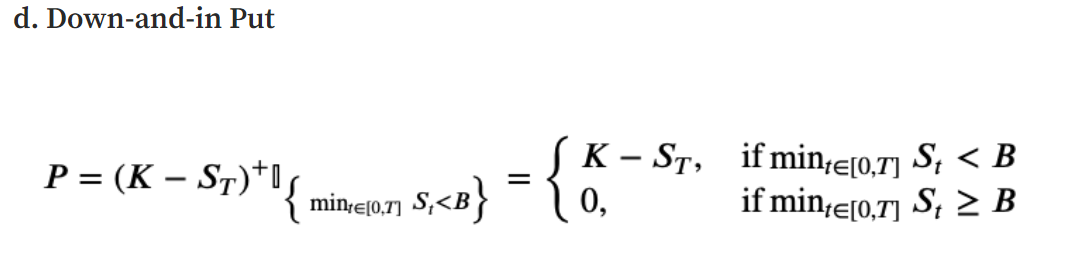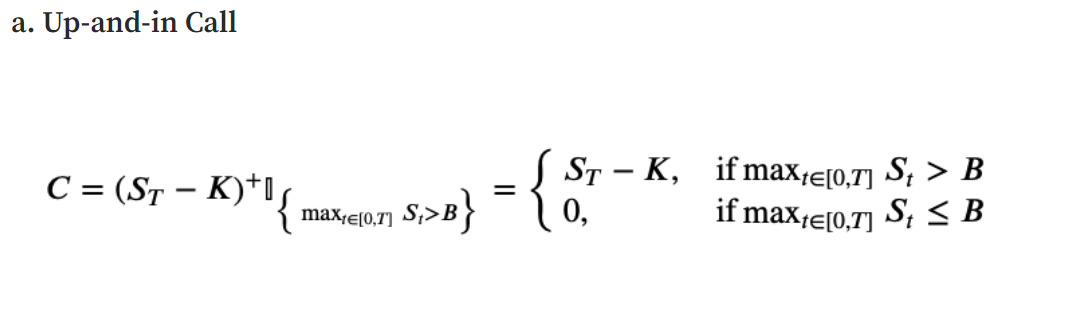

### **Q14**

In [28]:
def heston_mc_barrier(S, K, r, T, t,B,opttype):
  payoff=[]
  for i in range(M+1):
  
    if opttype == "C":
      if S[i, :].max()>B:
        payoff.append(np.maximum(0, S[i, :] - K)) 
      else:
        payoff.append(0) 
      average = np.mean(payoff[i])    
    print(f"European UAI Call Price {i} under Heston with correlation at -0.7 and barrier 95 : ",round(np.exp(-r * (T - t)) * average,2) ) 
    print(" ")
    print(f"European Call Price {i} under Heston with correlation at -0.7 and barrier 95 : ",round(heston_mc(S[[i]], K, r, T, 0,"C"), 2)  ) 
  return np.exp(-r * (T - t)) * average

In [29]:
K = 95
B=95



In [30]:
heston_mc_barrier(HS, K, r, T, 0,B,"C")

European UAI Call Price 0 under Heston with correlation at -0.7 and barrier 95 :  0.0
 
European Call Price 0 under Heston with correlation at -0.7 and barrier 95 :  0.0
European UAI Call Price 1 under Heston with correlation at -0.7 and barrier 95 :  0.0
 
European Call Price 1 under Heston with correlation at -0.7 and barrier 95 :  0.0
European UAI Call Price 2 under Heston with correlation at -0.7 and barrier 95 :  0.0
 
European Call Price 2 under Heston with correlation at -0.7 and barrier 95 :  0.0
European UAI Call Price 3 under Heston with correlation at -0.7 and barrier 95 :  0.0
 
European Call Price 3 under Heston with correlation at -0.7 and barrier 95 :  0.0
European UAI Call Price 4 under Heston with correlation at -0.7 and barrier 95 :  0.0
 
European Call Price 4 under Heston with correlation at -0.7 and barrier 95 :  0.0
European UAI Call Price 5 under Heston with correlation at -0.7 and barrier 95 :  0.0
 
European Call Price 5 under Heston with correlation at -0.7 an

0.0

**We obtain almost the same values for both types of options, but it is important to note that as the number of steps increases, both prices converge to the same value**

### **Q15**

In [31]:
K = 65
SM = merton_stockprice(S0,lamb,mu,delta,r,sigma,M,Ite,dt)
B=65


In [32]:
def merton_mc_barrier(S, K, r, T, t,B,opttype):
  payoff=[]
  for i in range(M+1):
 
    if opttype == "P":
      if S[i, :].min()<B:
        payoff.append(np.maximum(0, K-S[i, :])) 
      else:
        payoff.append(0)
        
      average = np.mean(payoff[i])

    print(f"European DAI Put Price {i}under Merton with jump intensity of 0.75: : ",round(np.exp(-r * (T - t)) * average,2) ) 
    print(" ")
    print(f"European ATM Put Price {i} under Merton with jump intensity of 0.75: ",  round(merton_mc(SM[[i]],K, r, T, 0,"P"),2) )    

  return np.exp(-r * (T - t)) * average

In [33]:
merton_mc_barrier(SM, K, r, T,0,B,"P")

European DAI Put Price 0under Merton with jump intensity of 0.75: :  0.0
 
European ATM Put Price 0 under Merton with jump intensity of 0.75:  0.0
European DAI Put Price 1under Merton with jump intensity of 0.75: :  0.0
 
European ATM Put Price 1 under Merton with jump intensity of 0.75:  0.0
European DAI Put Price 2under Merton with jump intensity of 0.75: :  0.0
 
European ATM Put Price 2 under Merton with jump intensity of 0.75:  0.0
European DAI Put Price 3under Merton with jump intensity of 0.75: :  0.0
 
European ATM Put Price 3 under Merton with jump intensity of 0.75:  0.0
European DAI Put Price 4under Merton with jump intensity of 0.75: :  0.0
 
European ATM Put Price 4 under Merton with jump intensity of 0.75:  0.0
European DAI Put Price 5under Merton with jump intensity of 0.75: :  0.0
 
European ATM Put Price 5 under Merton with jump intensity of 0.75:  0.0
European DAI Put Price 6under Merton with jump intensity of 0.75: :  0.0
 
European ATM Put Price 6 under Merton with 

3.5760751029624576

**We obtain almost the same values for both types of options, but it is important to note that as the number of steps increases, both prices converge to the same value**

# **REFERENCES**
1. https://medium.com/the-quant-journey/pricing-barrier-options-using-monte-carlo-simulation-791ec54263ff

2. Derivative pricing M7: Pricing Options with Jump Diffusion Models